In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/movie_dataset[1].csv")
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


# **CODEBOOK**

| Variable                  | Raw Type              | Description                                                                    | Notes / How to Parse                                    |
| ------------------------- | --------------------- | ------------------------------------------------------------------------------ | ------------------------------------------------------- |
| **index**                 | int                   | Original row index from the CSV                                                | Can be dropped after loading                            |
| **budget**                | float                 | Production budget (US dollars)                                                 |                                                         |
| **genres**                | string (JSON‐list)    | List of genre objects (each with `id` and `name`)                              | `ast.literal_eval` → list of dicts → extract `.name`    |
| **homepage**              | string                | URL of the movie’s official website                                            |                                                         |
| **id**                    | int                   | Unique movie identifier (e.g. TMDB ID)                                         |                                                         |
| **keywords**              | string (JSON‐list)    | List of keyword/tag objects                                                    | `ast.literal_eval` → list of dicts → extract `.name`    |
| **original\_language**    | string                | ISO 639‑1 code of the original release language (e.g. “en”)                    |                                                         |
| **original\_title**       | string                | Movie title in its original language                                           |                                                         |
| **overview**              | string                | Plot synopsis                                                                  | Clean (lowercase + remove punctuation) for NLP          |
| **popularity**            | float                 | TMDB popularity metric (combines views, searches, etc.)                        |                                                         |
| **production\_companies** | string (JSON‐list)    | Companies that produced the movie (each with `id` and `name`)                  | `ast.literal_eval` → list of dicts → extract `.name`    |
| **production\_countries** | string (JSON‐list)    | Countries involved in production (ISO code + name)                             | `ast.literal_eval` → list of dicts → extract `.name`    |
| **release\_date**         | string (`YYYY‑MM‑DD`) | Official release date                                                          | Convert to `datetime` for any time‑based analysis       |
| **revenue**               | float                 | Worldwide box‑office revenue (US dollars)                                      |                                                         |
| **runtime**               | float/int             | Movie duration (minutes)                                                       |                                                         |
| **spoken\_languages**     | string (JSON‐list)    | Languages spoken in the film (ISO code + name)                                 | `ast.literal_eval` → list of dicts → extract `.name`    |
| **status**                | string                | Release status (e.g. “Released”, “Post Production”)                            |                                                         |
| **tagline**               | string                | Marketing slogan or catchphrase                                                | Clean (lowercase + remove punctuation) if used in NLP   |
| **title**                 | string                | Localized title (the one generally shown to users)                             |                                                         |
| **vote\_average**         | float                 | Average user rating (0–10 scale)                                               |                                                         |
| **vote\_count**           | int                   | Number of user ratings submitted                                               |                                                         |
| **cast**                  | string (JSON‐list)    | List of principal cast member objects (each with `name`, `character`, etc.)    | `ast.literal_eval` → list of dicts → extract `.name`    |
| **crew**                  | string (JSON‐list)    | List of crew member objects (detailed info: `job`, `department`, `name`, etc.) | `ast.literal_eval` → list of dicts; filter for director |
| **director**              | string                | Director’s name (extracted from `crew` for convenience)                        | Wrap in list for your “soup”                            |


# **CLEANING DATASET**

In [ ]:
import ast

def parse_list(col):
    """Parse the data column into a list of lowercase names."""
    def _parse(x):
        try:
            items = ast.literal_eval(x)   # Parse the data
        except:
            return []                     # If parsing fails, return empty list
        names = []
        for i in items:
            if isinstance(i, dict) and 'name' in i:
                # Take the 'name' field, remove spaces, lowercase it
                names.append(i['name'].replace(" ", "").lower())
            elif isinstance(i, str):
                # If it's already a string, just clean spaces and lowercase
                names.append(i.replace(" ", "").lower())
        return names
    # Apply to the entire column, filling NaNs with '[]' so literal_eval won't error
    return df[col].fillna('[]').apply(_parse)

# Building a new list of columns
df['genres_list']   = parse_list('genres')
df['keywords_list'] = parse_list('keywords')
df['cast_list']     = parse_list('cast')       # list of cast members

df['director_list'] = df['director'].fillna('').apply(
    lambda x: [x.replace(" ", "").lower()] if x else []
)
# Clean the raw text: lowercase and strip out non-letter characters
df['overview_clean'] = (
    df['overview']
    .fillna('')
    .str.lower()                               # Lowercase all text
    .str.replace('[^a-z ]','', regex=True)     # Remove punctuation/numbers
)



# **SOUP & COSINE SIMILARITY**

In [ ]:
def make_soup(r):
    """
    Combine all selected metadata lists and overview text into one string.
    r: single row of df
    """
    parts = (
        r['genres_list'] +           # Movie genres
        r['keywords_list'] +         # Movie keywords
        r['cast_list'][:5] +         # top 5 cast members only
        r['director_list'] +         # list with one director
        r['overview_clean'].split()  # turn the text into words
    )
    return " ".join(parts)           # join all parts with spaces

# Create the combined feature “soup” for each movie
df['soup'] = df.apply(make_soup, axis=1)
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['soup'])
# Compute pairwise cosine similarity
cosine_sim  = linear_kernel(tfidf_matrix, tfidf_matrix)

# Build user input
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

# **RECOMMENDATION GENERATOR**

In [ ]:
def get_recs_with_score(title, top_n=10):
    """Return the top_n most similar movies with their cosine‐similarity scores."""
    idx        = indices[title]                              # Find the movie you ask for
    sim_scores = list(enumerate(cosine_sim[idx]))            # Finds the score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1: top_n+1]                      # drop the first one (itself)

    rec_indices   = [i for i,_ in sim_scores]
    rec_sim_values = [score for _,score in sim_scores]

    # Sort the similar movies
    recs = df.loc[rec_indices, ['title','vote_average','vote_count','popularity']].copy()
    recs['cosine_similarity'] = rec_sim_values
    return recs.sort_values('cosine_similarity', ascending=False)

# Example
get_recs_with_score('The Dark Knight')


,title,vote_average,vote_count,popularity,cosine_similarity
3,The Dark Knight Rises,7.6,9106,112.312950,0.258063
428,Batman Returns,6.6,1673,59.113174,0.244936
3854,"Batman: The Dark Knight Returns, Part 2",7.9,419,25.891466,0.208919
119,Batman Begins,7.5,7359,115.040024,0.193691
299,Batman Forever,5.2,1498,48.205606,0.151611
1359,Batman,7.0,2096,44.104469,0.138607
1181,JFK,7.5,502,26.820410,0.121233
9,Batman v Superman: Dawn of Justice,5.7,7004,155.790452,0.112951
2507,Slow Burn,5.5,16,6.630856,0.108374
879,Law Abiding Citizen,7.2,1486,49.593978,0.095205


In [ ]:
get_recs_with_score('Star Wars: Episode III - Revenge of the Sith')

,title,vote_average,vote_count,popularity,cosine_similarity
230,Star Wars: Episode II - Attack of the Clones,6.4,3992,43.987061,0.347172
233,Star Wars: Episode I - The Phantom Menace,6.3,4432,54.035265,0.327763
3208,Star Wars: Clone Wars: Volume 1,8.0,27,1.881466,0.289075
1990,The Empire Strikes Back,8.2,5879,78.517830,0.227105
1490,Return of the Jedi,7.9,4665,46.509071,0.200116
3184,The Ice Pirates,5.7,49,3.810697,0.143185
2912,Star Wars,8.1,6624,126.393695,0.111728
3405,Stargate: The Ark of Truth,6.9,140,8.591387,0.086967
422,The 6th Day,5.7,595,18.447479,0.080836
673,Austin Powers in Goldmember,5.9,979,40.137264,0.064796


# **K-Means CLUSTERING:**

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.sparse      import hstack
from sklearn.metrics   import silhouette_samples

## **CHOOSING NUMBER OF CLUSTERS**

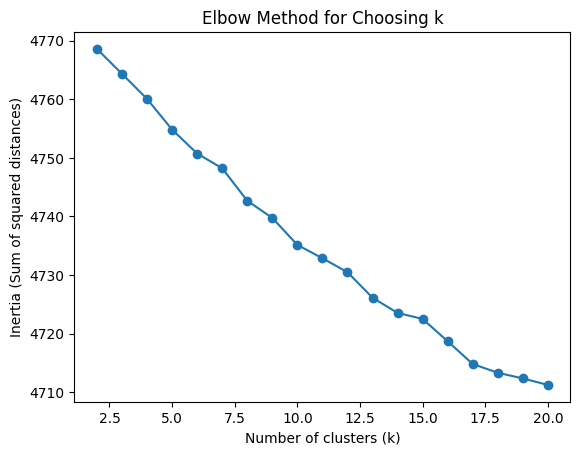

In [ ]:
# Range of k
inertias = [] # Represents how close your item is to the middle of the cluster
K = range(2, 21)  # Cluster size
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(tfidf_matrix)
    inertias.append(km.inertia_)

# Plot graph
plt.plot(K, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method for Choosing k')
plt.show()


In [ ]:
chosen_k = 7

# Balance the numbers in the cluster
num_feats   = df[['popularity','vote_count','vote_average','runtime']].fillna(0)
scaler      = StandardScaler()
num_scaled  = scaler.fit_transform(num_feats)

# Combine the data
X = hstack([tfidf_matrix, num_scaled])
kmeans = KMeans(n_clusters=chosen_k, random_state=42)
kmeans.fit(X)

# Assign cluster labels
df['cluster'] = kmeans.labels_


## **SILHOUETTE SCORES**

In [ ]:
sil_vals      = silhouette_samples(X, df['cluster'])
df['silhouette'] = sil_vals

def get_cluster_recs_enhanced(title, top_n=5, sort_by='silhouette'):
    """
    Recommend movies from the same cluster as `title`,
    showing extra metadata and how well they fit their cluster.
    """
    # find the cluster
    idx           = indices[title]
    movie_cluster = df.at[idx, 'cluster']

    #  filter peers (exclude the movie itself)
    peers = df[
        (df['cluster']==movie_cluster) & (df['title']!=title)
    ].copy()

    #  sort
    peers = peers.sort_values(by=sort_by, ascending=False)

    #  pick the columns to display
    cols = [
        'title', 'cluster', 'silhouette', 'release_date',
        'director', 'vote_average',
        'vote_count', 'popularity'
    ]
    return peers[cols].head(top_n)

# Example:
get_cluster_recs_enhanced('The Dark Knight', top_n=5, sort_by='silhouette')



#Silhouette score: How similar a movie is to its cluster / the rest of the movies in the cluster.

,title,cluster,silhouette,release_date,director,vote_average,vote_count,popularity
119,Batman Begins,6,0.421412,2005-06-10,Christopher Nolan,7.5,7359,115.040024
197,Harry Potter and the Philosopher's Stone,6,0.416625,2001-11-16,Chris Columbus,7.5,7006,109.984351
7,Avengers: Age of Ultron,6,0.416187,2015-04-22,Joss Whedon,7.3,6767,134.279229
809,Forrest Gump,6,0.412922,1994-07-06,Robert Zemeckis,8.2,7927,138.133331
1881,The Shawshank Redemption,6,0.406021,1994-09-23,Frank Darabont,8.5,8205,136.747729


## **METHOD COMPARISON**

In [ ]:
# 1) Cosine-based recommendations (nearest neighbors)
cosine_hits = get_recs_with_score(
    'The Dark Knight',
    top_n=5
)
# This Data has: title, vote_average, vote_count, popularity, cosine_similarity

# 2) Cluster-based recommendations (enhanced)
cluster_hits = get_cluster_recs_enhanced(
    'The Dark Knight',
    top_n=5,
    sort_by='silhouette'
)
# This Data has:
#   title, cluster, silhouette, release_date, director, genres_list,
#   vote_average, vote_count, popularity

print("=== Cosine-based Top 5 ===")
print(cosine_hits.to_string(index=False))

print("\n=== Cluster-based Top 5 (with Silhouette & Metadata) ===")
print(cluster_hits.to_string(index=False))


=== Cosine-based Top 5 ===
                                  title  vote_average  vote_count  popularity  cosine_similarity
                  The Dark Knight Rises           7.6        9106  112.312950           0.258063
                         Batman Returns           6.6        1673   59.113174           0.244936
Batman: The Dark Knight Returns, Part 2           7.9         419   25.891466           0.208919
                          Batman Begins           7.5        7359  115.040024           0.193691
                         Batman Forever           5.2        1498   48.205606           0.151611

=== Cluster-based Top 5 (with Silhouette & Metadata) ===
                                   title  cluster  silhouette release_date          director  vote_average  vote_count  popularity
                           Batman Begins        6    0.421412   2005-06-10 Christopher Nolan           7.5        7359  115.040024
Harry Potter and the Philosopher's Stone        6    0.416625   2001-11